In [751]:
from os import listdir
from os.path import isfile, join

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import matplotlib.style
import matplotlib as mpl
mpl.style.use('default')

In [752]:
AAAI_pal = {
    "Dark Blue": "#061B35",
    "Bright Blue": "#1240F5", 
    "Yellow":"#F0B546",
    "Light Blue": "#E1EEFE",
    "Main Blue": "#13396F"
}

box_pal = {
    "25%": AAAI_pal['Bright Blue'], 
    "50%": AAAI_pal['Yellow'],
    "75%": AAAI_pal['Main Blue']
}

In [753]:
# for i in ['cph', 'rsf', 'dcph', 'dcm', 'dsm', 'coxkan']:
#     for n in range(10):
#         print('python exp/test.py --data whas500 --model {} --seed {}'.format(i, n))

In [754]:
# for i in ['cph', 'rsf', 'dcph', 'dcm', 'dsm', 'coxkan']:
#     for n in range(10):
#         print('python exp/test.py --data pbc --model {} --seed {}'.format(i, n))

In [755]:
# for i in ['cph', 'rsf', 'dcph', 'dcm', 'dsm', 'coxkan']:
#     for n in range(10):
#         print('python exp/test.py --data colon --model {} --seed {}'.format(i, n))

In [756]:
# for i in ['cph', 'rsf', 'dcph', 'dcm', 'dsm', 'coxkan']:
#     for n in range(10):
#         print('python exp/test.py --data FRTCS --model {} --seed {}'.format(i, n))

In [757]:
# for i in ['cph', 'rsf', 'dcph', 'dcm', 'dsm', 'coxkan']:
#     for n in range(10):
#         print('python exp/test.py --data linear --model {} --seed {}'.format(i, n))

In [758]:
# for i in ['cph', 'rsf', 'dcph', 'dcm', 'dsm', 'coxkan']:
#     for n in range(10):
#         print('python exp/test.py --data non-linear --model {} --seed {}'.format(i, n))

In [759]:
# for i in ['dsm']:
#     for n in range(10):
#         print('python exp/test.py --data linear --model {} --seed {}'.format(i, n))

In [760]:
res_files = [f for f in listdir('../results/') if isfile(join('../results/', f))]

In [761]:
df_summary = pd.DataFrame()

for i in res_files:
    if i.split('.')[-1] != 'txt' or i.split('_')[1] == 'symbol':
        continue
    res = pd.read_csv('../results/{}'.format(i), sep=":\t", header=None, engine='python')
    res.columns = ["info", "value"]
    res = res.set_index('info')
    
    if len(list(res.transpose().columns)) < 4:
        continue
    
    res_25 = res.transpose()[list(res.transpose().columns[:3]) + list(res.transpose().columns[4:7])]
    res_25.columns = list(res.transpose().columns[:3]) + ['C-Index', 'Brier Score', 'ROC AUC']
    res_25['Quantile'] = '25%'
    
    res_5 = res.transpose()[list(res.transpose().columns[:3]) + list(res.transpose().columns[8:11])]
    res_5.columns = list(res.transpose().columns[:3]) + ['C-Index', 'Brier Score', 'ROC AUC']
    res_5['Quantile'] = '50%'
    
    res_75 = res.transpose()[list(res.transpose().columns[:3]) + list(res.transpose().columns[12:])]
    res_75.columns = list(res.transpose().columns[:3]) + ['C-Index', 'Brier Score', 'ROC AUC']
    res_75['Quantile'] = '75%'
    
    df_summary = pd.concat([df_summary, res_25, res_5, res_75])
    
    # df_summary = pd.concat([df_summary, res.transpose()])

df_summary.reset_index(inplace=True, drop=True)
df_summary

,model,data,seed,C-Index,Brier Score,ROC AUC,Quantile
0,dcm,pbc,4,0.810262677236914,0.12782111299906004,0.8235415548490981,25%
1,dcm,pbc,4,0.7669595132349019,0.18672159290179582,0.807367032912532,50%
2,dcm,pbc,4,0.6150607912604628,0.26565097763932616,0.6270270423700037,75%
3,dcm,linear,5,0.8093459938120132,0.11785297157479363,0.8330148112756808,25%
4,dcm,linear,5,0.7845517241379311,0.15388433183872186,0.8462262231716002,50%
...,...,...,...,...,...,...,...
949,dcm,linear,8,0.7815377491228382,0.15534106898596747,0.8456749672346003,50%
950,dcm,linear,8,0.7736574655822367,0.12923686334838183,0.8812359948107089,75%
951,coxkan,FRTCS,5,0.9018181818181819,0.015689898116783674,0.9044117647058822,25%
952,coxkan,FRTCS,5,0.8874076989916551,0.033503289935708905,0.8491624934742332,50%


In [762]:
for i in df_summary.columns[3:-1]:
    df_summary[i] = df_summary[i].astype('float')
    
df_summary['model'] = df_summary['model'].str.upper()
df_summary['model'] = df_summary['model'].str.replace('COXKAN', 'CoxKAN')

df_summary

,model,data,seed,C-Index,Brier Score,ROC AUC,Quantile
0,DCM,pbc,4,0.810263,0.127821,0.823542,25%
1,DCM,pbc,4,0.766960,0.186722,0.807367,50%
2,DCM,pbc,4,0.615061,0.265651,0.627027,75%
3,DCM,linear,5,0.809346,0.117853,0.833015,25%
4,DCM,linear,5,0.784552,0.153884,0.846226,50%
...,...,...,...,...,...,...,...
949,DCM,linear,8,0.781538,0.155341,0.845675,50%
950,DCM,linear,8,0.773657,0.129237,0.881236,75%
951,CoxKAN,FRTCS,5,0.901818,0.015690,0.904412,25%
952,CoxKAN,FRTCS,5,0.887408,0.033503,0.849162,50%


## Linear Experiments

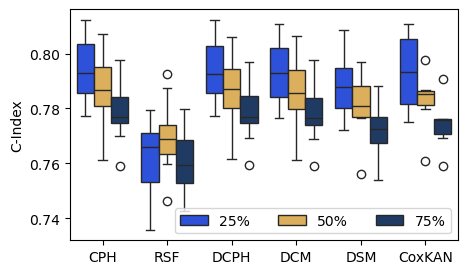

In [763]:
_ = plt.figure(figsize=(5,3))
sns.boxplot(df_summary.loc[df_summary.data=='linear'], x='model', y='C-Index', hue='Quantile', 
            order=['CPH', 'RSF', 'DCPH', 'DCM', 'DSM', 'CoxKAN'], palette=box_pal)
plt.xlabel(None)
plt.legend(loc="lower right", ncol=3)
plt.show()

## Non-Linear Experiments

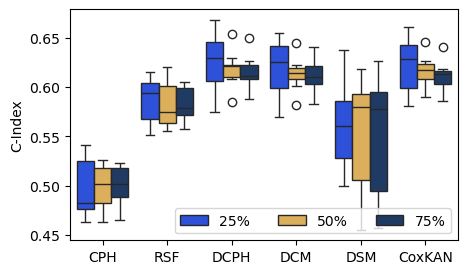

In [764]:
_ = plt.figure(figsize=(5,3))
sns.boxplot(df_summary.loc[df_summary.data=='non-linear'], x='model', y='C-Index', hue='Quantile', 
            order=['CPH', 'RSF', 'DCPH', 'DCM', 'DSM', 'CoxKAN'], palette=box_pal)
plt.xlabel(None)
plt.legend(loc="lower right", ncol=3)
plt.show()

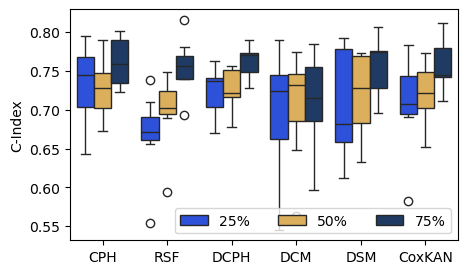

In [765]:
_ = plt.figure(figsize=(5,3))
sns.boxplot(df_summary.loc[df_summary.data=='whas500'], x='model', y='C-Index', hue='Quantile', 
            order=['CPH', 'RSF', 'DCPH', 'DCM', 'DSM', 'CoxKAN'], palette=box_pal)
plt.xlabel(None)
plt.legend(loc="lower right", ncol=3)
plt.show()

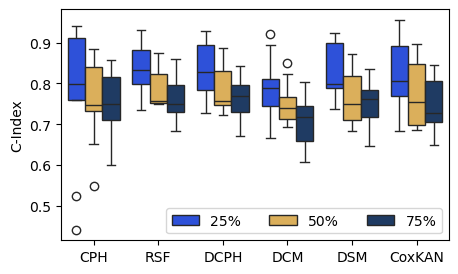

In [766]:
_ = plt.figure(figsize=(5,3))
sns.boxplot(df_summary.loc[df_summary.data=='pbc'], x='model', y='C-Index', hue='Quantile', 
            order=['CPH', 'RSF', 'DCPH', 'DCM', 'DSM', 'CoxKAN'], palette=box_pal)
plt.xlabel(None)
plt.legend(loc="lower right", ncol=3)
plt.show()

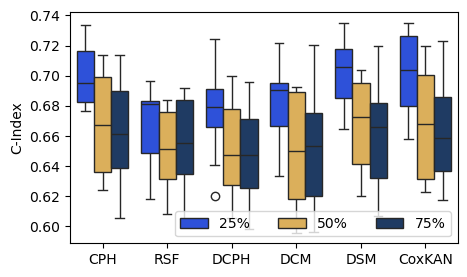

In [767]:
_ = plt.figure(figsize=(5,3))
sns.boxplot(df_summary.loc[df_summary.data=='colon'], x='model', y='C-Index', hue='Quantile', 
            order=['CPH', 'RSF', 'DCPH', 'DCM', 'DSM', 'CoxKAN'], palette=box_pal)
plt.xlabel(None)
plt.legend(loc="lower right", ncol=3)
plt.show()

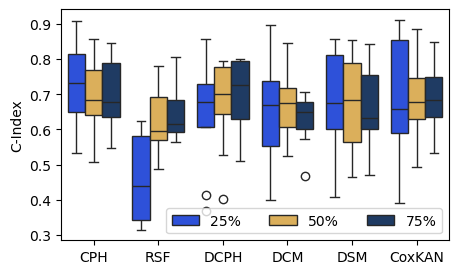

In [768]:
_ = plt.figure(figsize=(5,3))
sns.boxplot(df_summary.loc[df_summary.data=='FRTCS'], x='model', y='C-Index', hue='Quantile', 
            order=['CPH', 'RSF', 'DCPH', 'DCM', 'DSM', 'CoxKAN'], palette=box_pal)
plt.xlabel(None)
plt.legend(loc="lower right", ncol=3)
plt.show()